# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_data = requests.get(btc_url)

btc_content = btc_data.content
btc_json = btc_data.json()
btc_price = btc_json["data"]["1"]["quotes"]["USD"]["price"]
# Fetch current eth price
# YOUR CODE HERE!]
eth_data = requests.get(eth_url)

eth_content = eth_data.content
eth_json = eth_data.json()
eth_price = eth_json["data"]["1027"]["quotes"]["USD"]["price"]

In [6]:
# Compute current value of my crpto
# YOUR CODE HERE!
cv_crypto = btc_price + eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_price * my_btc}")
print(f"The current value of your {my_eth} eth is ${eth_price * my_eth}")
print(f"The current value of your crypto holdings is ${cv_crypto}!")

The current value of your 1.2 BTC is $13685.928
The current value of your 5.3 eth is $2018.876
The current value of your crypto holdings is $11785.86!


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("APCA_API_KEY")
alpaca_secret_key = os.getenv("APCA_API_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [9]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-10-13", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start= today,
    end = today
).df
# Preview DataFrame
# YOUR CODE HERE!
portfolio

AGG                                        SPY  \
                          open    high       low   close   volume    open   
2020-10-13 00:00:00-04:00  118  118.06  117.9294  118.01  3101197  352.16   

                                                               
                               high     low   close    volume  
2020-10-13 00:00:00-04:00  352.4651  349.09  350.15  61479085

In [10]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
closing_prices = pd.DataFrame()
closing_prices["AGG"] = portfolio["AGG"]["close"]
closing_prices["SPY"] = portfolio["SPY"]["close"]

closing_prices.index = closing_prices.index.date

closing_prices

,AGG,SPY
2020-10-13,118.01,350.15


In [11]:
agg_close = closing_prices["AGG"][0]
spy_close = closing_prices["SPY"][0]

In [12]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $118.01
Current SPY closing price: $350.15


In [13]:
# Compute the current value of shares
# YOUR CODE HERE!
cv_shares = (my_spy * spy_close) + (my_agg * agg_close)
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy * spy_close}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg * agg_close}")
print(f"The total value of your shares are ${cv_shares}!")

The current value of your 50 SPY shares is $17507.5
The current value of your 200 AGG shares is $23602.0
The total value of your shares are $41109.5!


### Savings Health Analysis

In [86]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Create savings DataFrame
# YOUR CODE HERE!
savings_df = pd.DataFrame([cv_crypto, cv_shares])
investment = ["crypto", "shares"]
savings_df["investment"] = investment
savings_df = savings_df.rename(columns= {0 : "amount"})
savings_df = savings_df.set_index("investment")

# Display savings DataFrame
display(savings_df)

,amount
investment,
crypto,11785.86
shares,41109.50


,amount,investment
0,11785.86,crypto
1,41109.50,shares


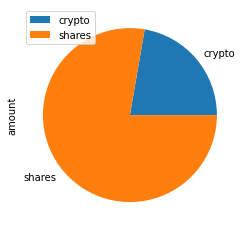

In [88]:
# Plot savings pie chart
# YOUR CODE HERE!
plot = savings_df.plot.pie(y="amount",x=" ")

In [91]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = cv_crypto + cv_shares
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congrats! You have enough money in your emergency fund")
else:
    print("Uh-oh, you need to start saving!")

Congrats! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

NameError: name 'df_stock_data' is not defined

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [20]:
# Printing the simulation input data
# YOUR CODE HERE!

In [21]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [22]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [23]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [25]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'ci_lower' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'ci_lower' is not defined

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [27]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [28]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [29]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [30]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [32]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [35]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [36]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [38]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

NameError: name 'ci_lower_ten' is not defined